#Preliminary operations

##Import libraries

In [1]:
# import main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
!pip install pyfim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 357 kB 4.5 MB/s 
  Created wheel for pyfim: filename=pyfim-6.28-cp38-cp38-linux_x86_64.whl size=540624 sha256=affe58a39f05b66eedc5d4b752b8f85895d8399da2e19b27c5c350452426e8f7
  Stored in directory: /root/.cache/pip/wheels/63/55/a8/2c0948641da51af014ab239f1724b573a059005b8a51d282a2
Successfully built pyfim


In [3]:
from fim import apriori

##Mount Google Drive

In [4]:
# mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Import datasets

In [8]:
# import dataframe (without outliers)
df = pd.read_excel("drive/MyDrive/Progetto Data Mining 1/Regression/Classification retest/Data cleaned/df_prep.xlsx", index_col="Unnamed: 0")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2452 entries, 0 to 2451
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vocal_channel        2452 non-null   object 
 1   emotion              2452 non-null   object 
 2   emotional_intensity  2452 non-null   object 
 3   statement            2452 non-null   object 
 4   repetition           2452 non-null   object 
 5   actor                2452 non-null   int64  
 6   sex                  2452 non-null   object 
 7   channels             2452 non-null   int64  
 8   frame_width          2452 non-null   int64  
 9   length_ms            2452 non-null   int64  
 10  frame_count          2452 non-null   int64  
 11  intensity            2452 non-null   float64
 12  zero_crossings_sum   2452 non-null   int64  
 13  mfcc_mean            2452 non-null   float64
 14  mfcc_std             2452 non-null   float64
 15  mfcc_min             2452 non-null   f

In [10]:
# get data columns
df_data = df.loc[:, "length_ms":"skew"]

# get values from data columns
X = df_data.values

# get emotion type from each emphasis group
y_emtype = df["emotion_type"]

## Data preprocessing

In [11]:
df_new = pd.DataFrame()
df_new['emotion'] = df['emotion']

columns = ["intensity", 
           "length_ms", 
           "zero_crossings_sum",
           "mean", 
           "kur", 
           "skew"
]


for col in columns:
  df_new[col] = pd.qcut(df[col], 8)
  df_new[col] = df_new[col].astype(str) +'_'+ col

df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2452 entries, 0 to 2451
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   emotion             2452 non-null   object
 1   intensity           2452 non-null   object
 2   length_ms           2452 non-null   object
 3   zero_crossings_sum  2452 non-null   object
 4   mean                2452 non-null   object
 5   kur                 2452 non-null   object
 6   skew                2452 non-null   object
dtypes: object(7)
memory usage: 153.2+ KB


In [12]:
df_newval = df_new.values.tolist()

In [13]:
for col in columns:
  print(col)
  print(np.sort(pd.unique(df_new[col])))

intensity
['(-27.828, -15.578]_intensity' '(-31.844, -27.828]_intensity'
 '(-34.925, -31.844]_intensity' '(-37.303, -34.925]_intensity'
 '(-39.912, -37.303]_intensity' '(-43.463, -39.912]_intensity'
 '(-47.36, -43.463]_intensity' '(-63.866, -47.36]_intensity']
length_ms
['(2935.999, 3437.0]_length_ms' '(3437.0, 3604.0]_length_ms'
 '(3604.0, 3770.0]_length_ms' '(3770.0, 4004.0]_length_ms'
 '(4004.0, 4271.0]_length_ms' '(4271.0, 4538.0]_length_ms'
 '(4538.0, 4805.0]_length_ms' '(4805.0, 6373.0]_length_ms']
zero_crossings_sum
['(10362.5, 11384.125]_zero_crossings_sum'
 '(11384.125, 12383.5]_zero_crossings_sum'
 '(12383.5, 13524.5]_zero_crossings_sum'
 '(13524.5, 14966.0]_zero_crossings_sum'
 '(14966.0, 17185.125]_zero_crossings_sum'
 '(17185.125, 30153.0]_zero_crossings_sum'
 '(4720.999, 9025.0]_zero_crossings_sum'
 '(9025.0, 10362.5]_zero_crossings_sum']
mean
['(-0.001944, -4.27e-06]_mean' '(-1.39e-06, -5.24e-07]_mean'
 '(-4.27e-06, -1.39e-06]_mean' '(-5.24e-07, -9.81e-08]_mean'
 '(-9.81

# FP-growth

In [14]:
from fim import fpgrowth
supp = 3.125
zmin = 2
max_supp = 25
lift_thresh=125

In [ ]:
help(fpgrowth)

Help on built-in function fpgrowth in module fim:

fpgrowth(...)
    fpgrowth (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
              eval='x', agg='x', thresh=10, prune=Nobe, algo='s', mode='',
              border=None)
    Find frequent item sets with the FP-growth algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support 

## Support plots

### Support vs number of itemsets

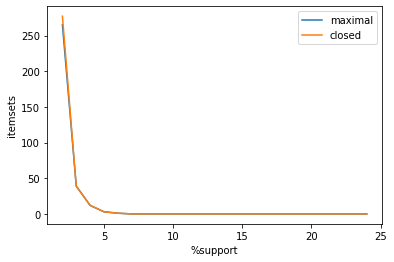

In [15]:
len_max_it = []
len_cl_it = []

for i in range(2, max_supp):
    max_itemsets = fpgrowth(df_newval, target="m", supp=i, zmin=zmin)
    cl_itemsets = fpgrowth(df_newval, target="c", supp=i, zmin=zmin)
    len_max_it.append(len(max_itemsets))
    len_cl_it.append(len(cl_itemsets))

plt.plot(np.arange(2, max_supp), len_max_it, label="maximal")
plt.plot(np.arange(2, max_supp), len_cl_it, label="closed")
plt.legend()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()

### Support vs number of itemset for strong / weak

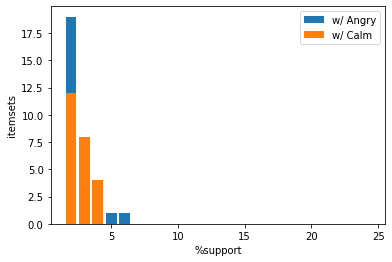

In [ ]:
filter_1 = []
filter_2 = []

for i in range(2, max_supp):
    max_itemsets = fpgrowth(df_newval, target="m", supp=i, zmin=zmin)
    filter_1.append(len([item for item in max_itemsets if "angry" in item[0]]))
    filter_2.append(len([item for item in max_itemsets if "calm" in item[0]]))

plt.bar(np.arange(2, max_supp), filter_1, label="w/ Angry")
plt.bar(np.arange(2, max_supp), filter_2, label="w/ Calm")
plt.legend()
plt.xticks()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()

### Rules

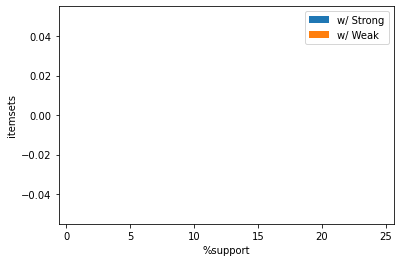

In [ ]:
filter_1 = []
filter_2 = []

for i in range(1, max_supp):
    max_itemsets = fpgrowth(df_newval, target="r", supp=i, zmin=zmin)
    filter_1.append(len([item for item in max_itemsets if "strong" in item[0]]))
    filter_2.append(len([item for item in max_itemsets if "weak" in item[0]]))

plt.bar(range(1, max_supp, 1), filter_1, label="w/ Strong")
plt.bar(range(1, max_supp, 1), filter_2, label="w/ Weak")
plt.legend()
plt.xticks()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()

* frequent itemset >= min_supp
* closed: an itemset is closed if none of its immediate supersets has the same support as the itemset
* maximal: an itemset is maximal frequent if none of its immediate supersets is frequent

## Frequent Itemset

In [16]:
itemsets = fpgrowth(
    df_newval, 
    target="s", 
    supp=supp, 
    zmin=zmin, 
    report="aS",
)

strong = "strong"
weak = "weak"

frequent_df = pd.DataFrame(itemsets, columns=["frequent_itemset", "support", "support_%"])
frequent_df.sort_values(by="support_%", axis=0, ascending=False)

,frequent_itemset,support,support_%
8,"((-27.828, -15.578]_intensity, angry)",169,6.892333
29,"((4805.0, 6373.0]_length_ms, (1.75700000000000...",139,5.668842
4,"((4720.999, 9025.0]_zero_crossings_sum, (2935....",124,5.057096
17,"((17185.125, 30153.0]_zero_crossings_sum, (-27...",120,4.893964
28,"((4805.0, 6373.0]_length_ms, calm)",120,4.893964
10,"((-63.866, -47.36]_intensity, calm)",116,4.730832
14,"((-63.866, -47.36]_intensity, (-2.358, -0.585]...",107,4.363785
12,"((-63.866, -47.36]_intensity, (2935.999, 3437....",104,4.241436
13,"((-63.866, -47.36]_intensity, (4720.999, 9025....",104,4.241436
5,"((-2.358, -0.585]_skew, calm)",103,4.200653


## Closed Itemsets

In [ ]:
itemsets = fpgrowth(
    df_newval, 
    target="c", 
    supp=supp, 
    zmin=zmin, 
    report="aS",
)

closed_df = pd.DataFrame(itemsets, columns=["closed_itemset", "support", "support_%"])
closed_df.sort_values(by="support_%", axis=0, ascending=False)

,closed_itemset,support,support_%
23,"((-27.828, -15.578]_intensity, angry)",169,6.892333
2,"((4805.0, 6373.0]_length_ms, (1.75700000000000...",139,5.668842
27,"((4720.999, 9025.0]_zero_crossings_sum, (2935....",124,5.057096
3,"((4805.0, 6373.0]_length_ms, calm)",120,4.893964
14,"((17185.125, 30153.0]_zero_crossings_sum, (-27...",120,4.893964
21,"((-63.866, -47.36]_intensity, calm)",116,4.730832
17,"((-63.866, -47.36]_intensity, (-2.358, -0.585]...",107,4.363785
18,"((-63.866, -47.36]_intensity, (4720.999, 9025....",104,4.241436
19,"((-63.866, -47.36]_intensity, (2935.999, 3437....",104,4.241436
26,"((-2.358, -0.585]_skew, calm)",103,4.200653


## Maximal Itemsets

In [ ]:
itemsets = fpgrowth(
    df_newval, 
    target="m", 
    zmin=zmin, 
    supp = supp,
    report="aS",
)

maximal_df = pd.DataFrame(itemsets, columns=["maximal_itemset", "support", "support_%"])
maximal_df.sort_values(by="support_%", axis=0, ascending=False)

,maximal_itemset,support,support_%
23,"((-27.828, -15.578]_intensity, angry)",169,6.892333
2,"((4805.0, 6373.0]_length_ms, (1.75700000000000...",139,5.668842
27,"((4720.999, 9025.0]_zero_crossings_sum, (2935....",124,5.057096
3,"((4805.0, 6373.0]_length_ms, calm)",120,4.893964
14,"((17185.125, 30153.0]_zero_crossings_sum, (-27...",120,4.893964
21,"((-63.866, -47.36]_intensity, calm)",116,4.730832
17,"((-63.866, -47.36]_intensity, (-2.358, -0.585]...",107,4.363785
18,"((-63.866, -47.36]_intensity, (4720.999, 9025....",104,4.241436
19,"((-63.866, -47.36]_intensity, (2935.999, 3437....",104,4.241436
26,"((-2.358, -0.585]_skew, calm)",103,4.200653


In [ ]:
maximal_df[maximal_df["maximal_itemset"].isin(["calm"])].sort_values(by="support_%", axis=0, ascending=False)

,maximal_itemset,support,support_%


## Rules

if the target is association rules:
                a list of rules (i.e. tuples with two or more elements),
                each consisting of a head/consequent item, a tuple with
                a body/antecedent item set, and the values selected by
                the parameter 'report', which may be combined into a
                tuple or a list if report[0] is '(' or '[', respectively.

In [30]:
rules = fpgrowth(
    df_newval, 
    target="r", 
    supp=2,
    zmin=2,
    conf=7.5,
    eval="l",
    thresh=110,
    report="XYCl",
)

rules

rules_fp_df = pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "body_support",
        "head_support",
        "confidence",
        "lift"
    ],
)

rules_fp_df["supp_weighted"] = rules_fp_df["body_support"]*rules_fp_df["lift"]
rules_fp_df[rules_fp_df["consequent"].isin(["neutral", "sad", "calm", "angry", "happy", "surprised", "disgust", "fearful"])].sort_values(by="supp_weighted", axis=0, ascending=False)
rules_fp_df[rules_fp_df["consequent"].isin(["sad"])].sort_values(by="supp_weighted", axis=0, ascending=False)

,consequent,antecedent,body_support,head_support,confidence,lift,supp_weighted
3837,sad,"((4805.0, 6373.0]_length_ms,)",12.234910,15.334421,32.666667,2.130284,26.063830
1019,sad,"((1.7570000000000001, 4.94]_kur,)",12.520392,15.334421,25.732899,1.678114,21.010638
133,sad,"((-2.358, -0.585]_skew,)",12.520392,15.334421,24.755700,1.614388,20.212766
693,sad,"((-63.866, -47.36]_intensity,)",12.520392,15.334421,22.475570,1.465694,18.351064
6,sad,"((-43.463, -39.912]_intensity,)",12.601958,15.334421,22.006472,1.435103,18.085106
...,...,...,...,...,...,...,...
2077,sad,"((-0.585, -0.337]_skew, (10362.5, 11384.125]_z...",2.161501,15.334421,18.867925,1.230430,2.659574
1746,sad,"((8.36e-07, 2.86e-06]_mean, (4.94, 6.52]_kur)",2.079935,15.334421,17.647059,1.150814,2.393617
500,sad,"((-0.337, -0.148]_skew, (2.86e-06, 0.00122]_mean)",2.079935,15.334421,17.647059,1.150814,2.393617
262,sad,"((10362.5, 11384.125]_zero_crossings_sum, (343...",2.039152,15.334421,18.000000,1.173830,2.393617


#Classification

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_new.drop("emotion", axis=1),
    df["emotion"],
    test_size=0.2, 
    random_state=0,
    stratify=df["emotion"]
)

In [ ]:
y_pred = X_test.apply(lambda x: "angry" if x["intensity"] == "(-27.828, -15.578]_intensity" else (
    "surprised" if x["length_ms"] == "(2935.999, 3437.0]_length_ms" else (
        "calm" if x["length_ms"] == "(4805.0, 6373.0]_length_ms" else (
            "neutral" if x["intensity"] == "(-63.866, -47.36]_intensity" else (
                "disgust" if x["kur"] == "(17.801, 59.086]_kur" else (
                    "fearful" if x["intensity"] == "(-31.844, -27.828]_intensity" else (
                        "happy" if x["intensity"] == "(-34.925, -31.844]_intensity" else "sad"
                    )
                )
            )
        )
    )
), axis=1)

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=["neutral", "sad", "calm", "angry", "happy", "surprised", "disgust", "fearful"])

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["neutral", "sad", "calm", "angry", "happy", "surprised", "disgust", "fearful"])

<Figure size 2160x2160 with 0 Axes>

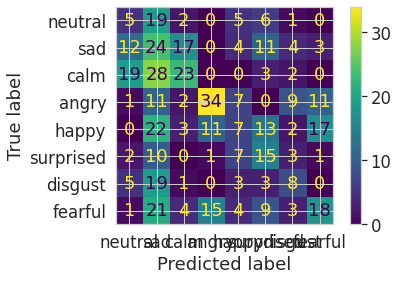

In [ ]:
plt.figure(figsize=(30, 30))
sns.set_theme(style="whitegrid", font_scale=1.5)
disp.plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.56      0.45      0.50        75
        calm       0.44      0.31      0.36        75
     disgust       0.25      0.21      0.23        39
     fearful       0.36      0.24      0.29        75
       happy       0.19      0.09      0.12        75
     neutral       0.11      0.13      0.12        38
         sad       0.16      0.32      0.21        75
   surprised       0.25      0.38      0.30        39

    accuracy                           0.27       491
   macro avg       0.29      0.27      0.27       491
weighted avg       0.31      0.27      0.28       491

